In [1]:
import pandas as pd
df = pd.read_csv('/content/Ice Cream.csv')
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [28]:

df.isnull().sum()

df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)

#df.dropna(inplace=True)


<ipython-input-28-79defe226f0e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)


In [29]:

df.head()
df

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567


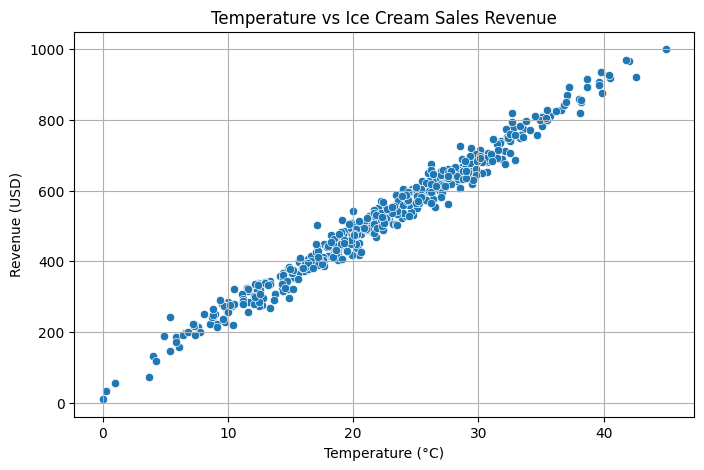

             Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


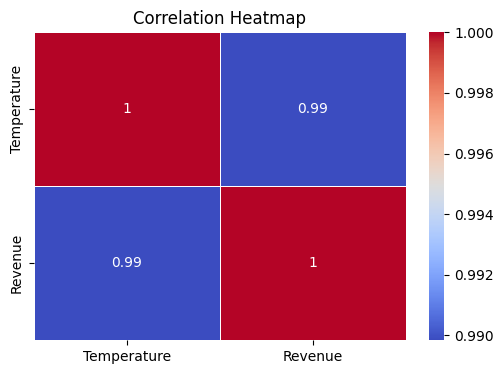

In [30]:

plt.figure(figsize=(8, 5))

sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Temperature vs Ice Cream Sales Revenue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()


correlation = df.corr(numeric_only=True)
print( correlation)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
X = df[['Temperature']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

print("linear regression")
print("MAE:", mean_absolute_error(y_test, lr_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("R² Score:", r2_score(y_test, lr_predictions))
print(" ");
print("decision tree")
print("MAE:", mean_absolute_error(y_test, dt_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_predictions)))
print("R² Score:", r2_score(y_test, dt_predictions))


linear regression
MAE: 19.195652579103704
RMSE: 25.543958747446354
R² Score: 0.9771509516333023
 
decision tree
MAE: 25.85583333333333
RMSE: 33.3453884451142
R² Score: 0.9610629297649239
